ASU ID - 1229620381, Name - Vaibhav Ajitkumar Shrivastav

In [431]:
import sys; sys.path.append('../..') ; sys.path.append('..') ; from my_utils import *

import torch 
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
# dummy trainloader 
trainloader = data.DataLoader(data.TensorDataset(torch.Tensor(1), torch.Tensor(1)), batch_size=1, shuffle=True) 
device = torch.device('cpu')
import matplotlib.pyplot as plt

In this homework, there are three different datasets consisting of 2-dimensional input features and binary class labels, and you will be asked to implement machine learning classifiers.

Let's begin by importing some libaries.

Next, we set a random seed for reproducibility.

In [432]:
import numpy as np
import random

seed = 0
np.random.seed(seed)
torch.random.manual_seed(seed)
random.seed(seed)

# Concentric annuli


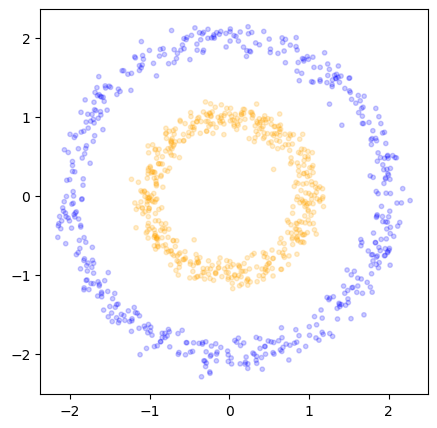

In [433]:
X, y = sample_annuli()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

In [434]:
import pandas as pd
df = pd.DataFrame(data = np.array(X))
df['y'] = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(X,y , test_size=0.25, random_state = 0)
df.head()

,0,1,y
0,1.048919,-0.098584,1
1,-0.920901,0.187921,1
2,-0.656876,-0.822509,1
3,0.334332,0.819018,1
4,-0.904201,-0.520136,1


TASK 1

[2pt] Let's start by implmenting a logistic regression model. Fill the template below to complete the logisitc regression model. Use the binary cross entropy loss, torch.nn.BCELoss.

(i) Complete the model, (ii) finish the training loop, (iii) present the results with a figure (see the example below) and the classification accuracy

In [435]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.linear = nn.Linear(2,1)

    def forward(self, x):
        y = torch.sigmoid(self.linear(x))
        return y

In [436]:
model = Model().to(device)

In [437]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)
criterion = nn.BCELoss()

In [438]:
# complete the following training loop.
for itr in range(1, 1001):
    #zero gradients
    optimizer.zero_grad()
    yh = model(X)
    loss = criterion(yh.squeeze() ,y.float())
    #backward pass
    loss.backward()
    #updates
    optimizer.step()
    # if itr%100 == 0:
    print(loss)

tensor(0.7246, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7224, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7203, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7182, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7163, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7144, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7126, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7108, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7092, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7076, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7061, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7047, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7034, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7022, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6999, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6990, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6980, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6972, grad_fn=<Bina

C:\Users\Vaibh\AppData\Local\Temp\ipykernel_71272\2693665614.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu')


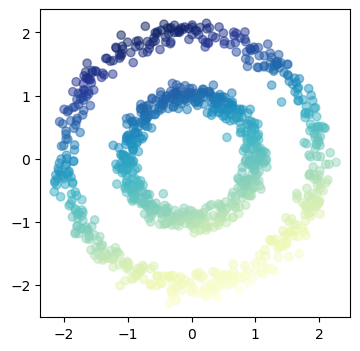

In [439]:
# visualize the result and report the accuracy
cmap = plt.cm.get_cmap('YlGnBu')
with torch.no_grad():

    fig = plt.figure(figsize=(4,4))
    plt.scatter(X[:,0], X[:,1], c = yh, cmap = cmap, alpha = 0.5)

Task 2

It is obvious that the logistic regression would not be able to distinguish two classes (not linearly separate data). You will have to build another model. 

[3pt] In the class template below, implement your own model that will achieve 100% accuracy in classifying the data poitns in training set. There is one restriction; you are allowed to use "one" linear layer for your implementation as in the logistic regression model above. But you are allowed to use as many nonlinear functions as needed.  

Examples of non-linear layers in PyTorch (notice they are all modules of torch.nn):

nn.Tanh()
nn.ReLU()

In [442]:
class Model2(nn.Module):
    def __init__(self,device="cpu"):
        super(Model2, self).__init__()
        
        self.net = nn.Sequential(
            #experimentally found tanhshrink to be giving good results
            nn.Tanhshrink(),
            
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        #squaring as per the lesson learnt in kernels, projecting to a higher dimension
        x = torch.square(x)
        y = self.net(x)
        return y

In [443]:
model2 = Model2().to(device)

In [444]:
optimizer = optim.AdamW(model2.parameters(), lr=1e-2, weight_decay=1e-6)
criterion = nn.BCELoss()

In [446]:
from sklearn.preprocessing import normalize
for itr in range(1, 1001):
    #zero gradients
    optimizer.zero_grad()
    yh = model2(X)
    loss = criterion(yh.squeeze() ,y.float())
    #backward pass
    loss.backward()
    #updates
    optimizer.step()
    if itr%100 == 0:
        print(loss)

tensor(0.0299, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0265, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0237, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0214, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0194, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0177, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0162, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0149, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0138, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0127, grad_fn=<BinaryCrossEntropyBackward0>)


In [447]:
with torch.no_grad(): 
    # Perform evaluation once all 1000 training epochs are done
    y_pred = model2(X)
    label = (y_pred[:,0] >= 0.5).long()
    err = torch.sum(torch.abs(label - y))
    print(err)
    print(1. - err) # Accuracy


tensor(0)
tensor(1.)


C:\Users\Vaibh\AppData\Local\Temp\ipykernel_71272\1719768815.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu')


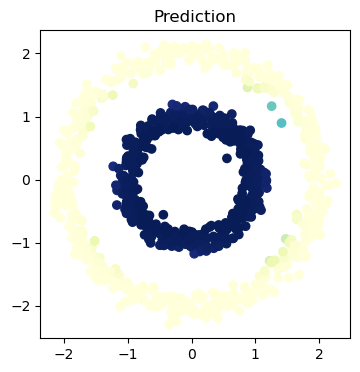

In [448]:
cmap = plt.cm.get_cmap('YlGnBu')
with torch.no_grad():

    fig = plt.figure(figsize=(4,4))
    plt.scatter(X[:,0], X[:,1], c = yh, cmap = cmap, alpha =1)
    plt.title('Prediction')

# Spiral dataset


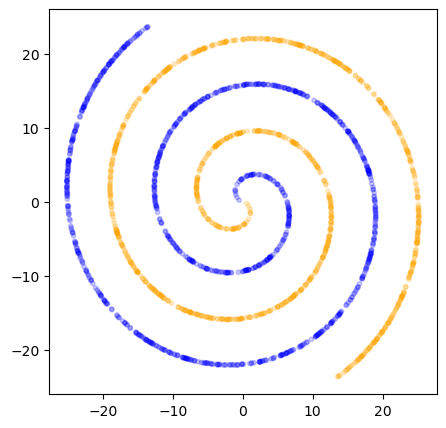

In [425]:
X, y = sample_spiral()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

Task 3

It's obvious that neither the logistic regression nor the model you developed for the second dataset would not work for this dataset. 

[3pt] implemented a neural network of your choice and achieve 100% classification accuracy

In [426]:
class Model3(nn.Module):
    def __init__(self,device="cpu"):
        super(Model3, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2,50),
            nn.Tanh(),
            nn.Linear(50,50),
            nn.Tanh(),
            nn.Linear(50,1))
        #for p in self.linear_layer.parameters(): torch.nn.init.zeros_(p)

    def forward(self, x):
        y = self.net(x)
        y = torch.sigmoid(y)
        return y

In [427]:
model3 = Model3().to(device)

In [428]:
optimizer = optim.AdamW(model3.parameters(), lr=1e-2, weight_decay=1e-6)

In [429]:
for itr in range(1, 1001):
    optimizer.zero_grad()
#    x0, y = sample_annuli(device=device, n_samples=1024)
        
    yh = model3(X)
    loss = nn.BCELoss()(yh.squeeze(), y.float())
    print(itr,loss.item())
    #loss_traj[itr-1] = loss.item()
    loss.backward()
    optimizer.step()

1 0.6863315105438232
2 0.7187483906745911
3 0.6712204813957214
4 0.6821600794792175
5 0.6861546039581299
6 0.6722385883331299
7 0.6652229428291321
8 0.6684250235557556
9 0.671859860420227
10 0.6701980233192444
11 0.6657152771949768
12 0.6624469757080078
13 0.6621698141098022
14 0.6636546850204468
15 0.6645035147666931
16 0.6634788513183594
17 0.6611377596855164
18 0.6589213609695435
19 0.6578884124755859
20 0.657916784286499
21 0.657878041267395
22 0.656735897064209
23 0.6545668244361877
24 0.652484655380249
25 0.6514768004417419
26 0.6511526703834534
27 0.6500186324119568
28 0.6476422548294067
29 0.6454055309295654
30 0.6442955136299133
31 0.643032968044281
32 0.6404210925102234
33 0.6379827857017517
34 0.6368457078933716
35 0.6345685720443726
36 0.6316235065460205
37 0.6301279664039612
38 0.6273697018623352
39 0.6249841451644897
40 0.6232141852378845
41 0.6201590895652771
42 0.6187856197357178
43 0.6163374781608582
44 0.6154015064239502
45 0.6133973598480225
46 0.6116297841072083
47 

torch.Size([2048, 1])
tensor([0, 0, 0,  ..., 1, 1, 1])


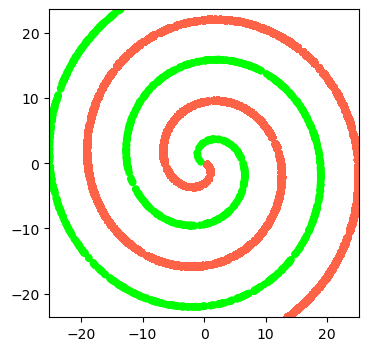

torch.Size([2048, 2])
tensor(0)


In [430]:
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1,1,1))#,sharex=True,sharey=True))
    xs, ys = X, y#sample_gaussian(n_samples=200) ; s = torch.linspace(0, 1, 10)
    y_pred = model3(xs)
    print(y_pred.shape)
    label = (y_pred[:,0] >= 0.5).long()
    print(label)
    colors = ['lime','tomato']
    for i in range(1024):
        axes[0].scatter(xs[i,0], xs[i,1], c=colors[label[i]], edgecolor='none', s=30)
        axes[0].scatter(xs[i+1024:,0], xs[i+1024:,1], c=colors[label[i+1024]], edgecolor='none', s=30)
    axes[0].set_xlim(xs[:,0].min(), xs[:,0].max()) ; axes[0].set_ylim(xs[:,1].min(), xs[:,1].max())
    plt.show()
   
    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)
    
